In [47]:
!pip install catboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc




In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd

file_path = '/content/drive/MyDrive/medellin_clima_2_anios.csv'

df = pd.read_csv(file_path)

print(df.head())

   codigo_x           fecha_hora  h_promedio     h_std   h_sum  t_promedio  \
0       197  2022-06-29 14:45:00   60.322667  0.593506  904.84   24.714667   
1       197  2022-06-29 15:00:00   59.664667  1.366768  894.97   24.759333   
2       197  2022-06-29 15:15:00   59.628000  0.709368  894.42   24.617333   
3       197  2022-06-29 15:30:00   59.266667  0.651050  889.00   24.583333   
4       197  2022-06-29 15:45:00   61.250000  0.883338  918.75   24.980000   

      t_std   t_sum  pr_promedio    pr_std  ...  p_sum  p_min  p_max  \
0  0.105076  370.72   842.491333  0.065232  ...    0.0    0.0    0.0   
1  0.070353  371.39   842.331333  0.040685  ...    0.0    0.0    0.0   
2  0.112787  369.26   842.247333  0.075068  ...    0.0    0.0    0.0   
3  0.106413  368.75   842.081333  0.064128  ...    0.0    0.0    0.0   
4  0.165357  374.70   841.872000  0.065049  ...    0.0    0.0    0.0   

   codigo_mapeado_2  codigo  nivel_metros_promedio  nivel_metros_std  \
0                93      9

In [50]:
df['lluvia'] = 0
df.loc[df['p_sum'] >= 0.7, 'lluvia'] = 1
df['condicion'] = df['lluvia'].map({1: 'llueve', 0: 'no llueve'})
print(df.head())


   codigo_x           fecha_hora  h_promedio     h_std   h_sum  t_promedio  \
0       197  2022-06-29 14:45:00   60.322667  0.593506  904.84   24.714667   
1       197  2022-06-29 15:00:00   59.664667  1.366768  894.97   24.759333   
2       197  2022-06-29 15:15:00   59.628000  0.709368  894.42   24.617333   
3       197  2022-06-29 15:30:00   59.266667  0.651050  889.00   24.583333   
4       197  2022-06-29 15:45:00   61.250000  0.883338  918.75   24.980000   

      t_std   t_sum  pr_promedio    pr_std  ...  p_max  codigo_mapeado_2  \
0  0.105076  370.72   842.491333  0.065232  ...    0.0                93   
1  0.070353  371.39   842.331333  0.040685  ...    0.0                93   
2  0.112787  369.26   842.247333  0.075068  ...    0.0                93   
3  0.106413  368.75   842.081333  0.064128  ...    0.0                93   
4  0.165357  374.70   841.872000  0.065049  ...    0.0                93   

   codigo  nivel_metros_promedio  nivel_metros_std  nivel_metros_sum  \
0 

In [51]:
df.fecha_hora = pd.to_datetime(df.fecha_hora)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432480 entries, 0 to 432479
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   codigo_x               432480 non-null  int64         
 1   fecha_hora             432480 non-null  datetime64[ns]
 2   h_promedio             432480 non-null  float64       
 3   h_std                  432480 non-null  float64       
 4   h_sum                  432480 non-null  float64       
 5   t_promedio             432480 non-null  float64       
 6   t_std                  432480 non-null  float64       
 7   t_sum                  432480 non-null  float64       
 8   pr_promedio            432480 non-null  float64       
 9   pr_std                 432480 non-null  float64       
 10  pr_sum                 432480 non-null  float64       
 11  vv_promedio            432480 non-null  float64       
 12  vv_std                 432480 non-null  floa

In [52]:
df = df.sort_values(by=["codigo_x", "fecha_hora"]).reset_index(drop=True)
df.head()

,codigo_x,fecha_hora,h_promedio,h_std,h_sum,t_promedio,t_std,t_sum,pr_promedio,pr_std,...,p_max,codigo_mapeado_2,codigo,nivel_metros_promedio,nivel_metros_std,nivel_metros_sum,nivel_metros_min,nivel_metros_max,lluvia,condicion
0,197,2022-06-29 14:45:00,60.322667,0.593506,904.84,24.714667,0.105076,370.72,842.491333,0.065232,...,0.0,93,93,0.597520,0.006205,8.962799,0.5892,0.6065,0,no llueve
1,197,2022-06-29 15:00:00,59.664667,1.366768,894.97,24.759333,0.070353,371.39,842.331333,0.040685,...,0.0,93,93,0.596887,0.007073,8.953300,0.5848,0.6141,0,no llueve
2,197,2022-06-29 15:15:00,59.628000,0.709368,894.42,24.617333,0.112787,369.26,842.247333,0.075068,...,0.0,93,93,0.590020,0.006234,8.850299,0.5794,0.5984,0,no llueve
3,197,2022-06-29 15:30:00,59.266667,0.651050,889.00,24.583333,0.106413,368.75,842.081333,0.064128,...,0.0,93,93,0.584540,0.005627,8.768099,0.5735,0.5935,0,no llueve
4,197,2022-06-29 15:45:00,61.250000,0.883338,918.75,24.980000,0.165357,374.70,841.872000,0.065049,...,0.0,93,93,0.581833,0.004773,8.727501,0.5740,0.5913,0,no llueve


In [53]:
df["target_t-1"] = df.groupby("codigo_x")["lluvia"].shift(-1)
df.tail()

,codigo_x,fecha_hora,h_promedio,h_std,h_sum,t_promedio,t_std,t_sum,pr_promedio,pr_std,...,codigo_mapeado_2,codigo,nivel_metros_promedio,nivel_metros_std,nivel_metros_sum,nivel_metros_min,nivel_metros_max,lluvia,condicion,target_t-1
432475,419,2024-07-19 09:30:00,71.722000,1.025749,1075.83,22.409333,0.128867,336.14,852.318000,0.031893,...,93,93,0.653427,0.002069,9.801399,0.6498,0.6565,0,no llueve,0.0
432476,419,2024-07-19 09:45:00,67.688667,1.601784,1015.33,22.920667,0.316915,343.81,852.330000,0.044078,...,93,93,0.655467,0.002047,9.832000,0.6517,0.6583,0,no llueve,0.0
432477,419,2024-07-19 10:00:00,64.669333,0.805468,970.04,23.826667,0.284119,357.40,852.110000,0.118743,...,93,93,0.657493,0.001535,9.862401,0.6549,0.6603,0,no llueve,0.0
432478,419,2024-07-19 10:15:00,62.563333,1.400019,938.45,24.600000,0.270581,369.00,851.821333,0.118011,...,93,93,0.658673,0.001965,9.880099,0.6550,0.6626,0,no llueve,0.0
432479,419,2024-07-19 10:30:00,62.754000,0.400475,313.77,24.514000,0.080808,122.57,851.702000,0.008367,...,93,93,0.661417,0.001454,3.968500,0.6596,0.6629,0,no llueve,NaN


In [54]:
data = df[['condicion', 'target_t-1', 'pr_promedio','t_promedio', 'vv_promedio', "t_sum", 'vv_max_promedio']]
data = data.dropna().reset_index(drop=True)
data.tail()

,condicion,target_t-1,pr_promedio,t_promedio,vv_promedio,t_sum,vv_max_promedio
432469,no llueve,0.0,852.426000,21.790000,2.103333,326.85,3.046667
432470,no llueve,0.0,852.318000,22.409333,2.108000,336.14,2.933333
432471,no llueve,0.0,852.330000,22.920667,1.637333,343.81,2.733333
432472,no llueve,0.0,852.110000,23.826667,1.223333,357.40,2.193333
432473,no llueve,0.0,851.821333,24.600000,1.182000,369.00,2.114286


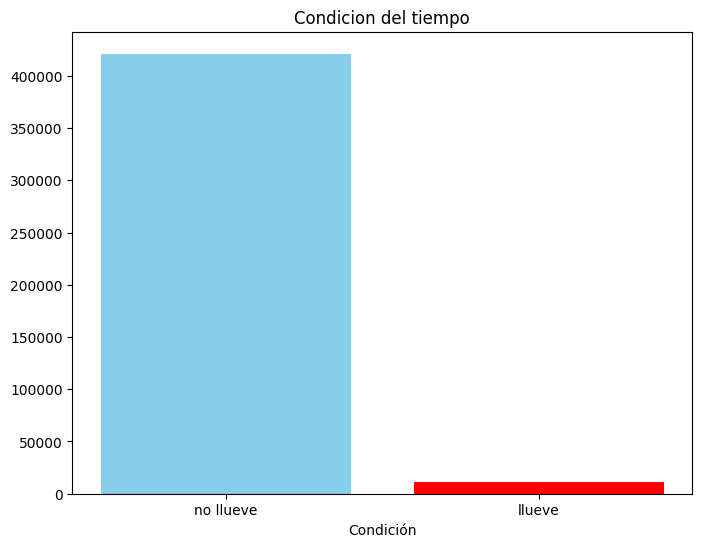

In [55]:
lluvia_counts = data['condicion'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(lluvia_counts.index, lluvia_counts.values, color=['skyblue', 'red'])
plt.title('Condicion del tiempo')
plt.xlabel('Condición')

plt.show()

condicion
llueve       11334
no llueve    11334
Name: count, dtype: int64


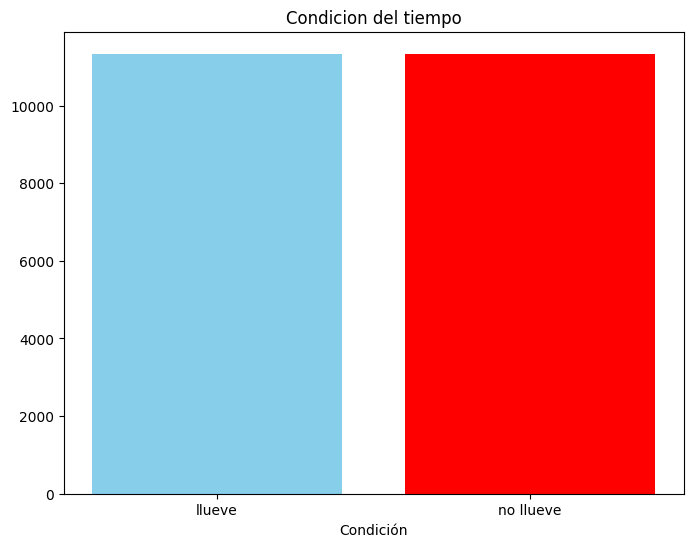

In [56]:
minority_class_size = lluvia_counts.min()

data_balanced = pd.concat([
    data[data['condicion'] == 'llueve'].sample(n=minority_class_size, random_state=42),
    data[data['condicion'] == 'no llueve'].sample(n=minority_class_size, random_state=42)
])

balanced_lluvia_counts = data_balanced['condicion'].value_counts()
print(balanced_lluvia_counts)

plt.figure(figsize=(8, 6))
plt.bar(balanced_lluvia_counts.index, balanced_lluvia_counts.values, color=['skyblue', 'red'])
plt.title('Condicion del tiempo')
plt.xlabel('Condición')
plt.show()


In [57]:
data_balanced

,condicion,target_t-1,pr_promedio,t_promedio,vv_promedio,t_sum,vv_max_promedio
48803,llueve,0.0,848.188000,18.755333,0.434667,281.33,0.600000
13397,llueve,0.0,844.244000,18.730000,1.466000,280.95,1.993333
176458,llueve,0.0,766.962500,13.200000,0.475000,105.60,0.837500
176065,llueve,0.0,769.433333,13.006667,0.593333,195.10,1.253333
219519,llueve,1.0,819.528667,15.956667,1.438667,239.35,2.080000
...,...,...,...,...,...,...,...
203073,no llueve,0.0,768.006667,12.333333,0.320000,185.00,0.586667
117477,no llueve,0.0,850.513333,27.733333,1.020000,416.00,2.313333
329843,no llueve,0.0,748.135333,11.585333,3.582000,173.78,5.946667
280356,no llueve,0.0,819.665333,24.549333,1.996000,368.24,3.493333


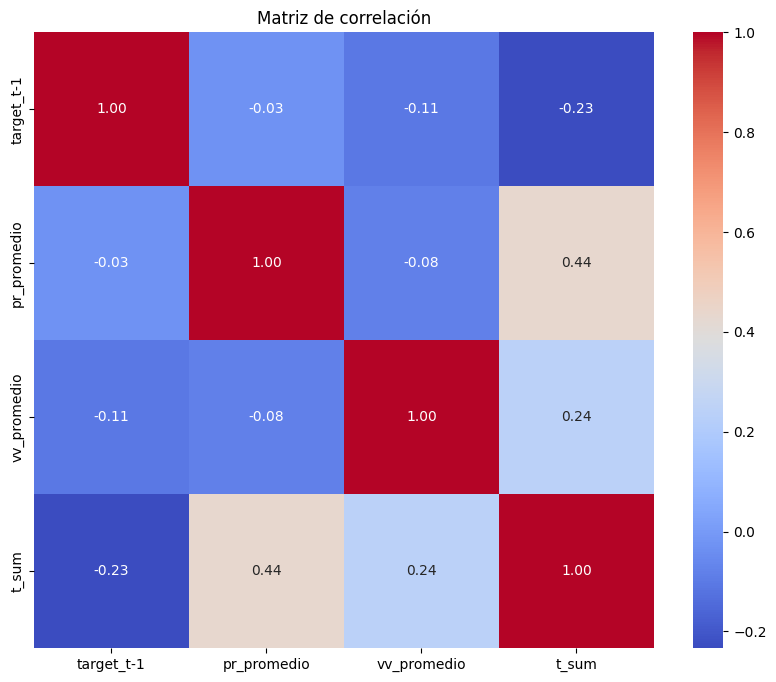

In [58]:
correlation_matrix = data_balanced[['target_t-1', 'pr_promedio', 'vv_promedio', "t_sum"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

In [59]:
X = data_balanced[['pr_promedio', 'vv_promedio', "t_sum"]]
y = data_balanced['target_t-1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.86      0.80      3193
         1.0       0.49      0.33      0.40      1341

    accuracy                           0.70      4534
   macro avg       0.62      0.59      0.60      4534
weighted avg       0.68      0.70      0.68      4534

Confusion Matrix:
 [[2735  458]
 [ 897  444]]


In [60]:
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=10)
catboost_classifier.fit(X_train, y_train)

y_pred_catboost = catboost_classifier.predict(X_test)

print("CatBoost Classification Report:\n", classification_report(y_test, y_pred_catboost))
print("CatBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))

0:	learn: 0.6678768	total: 2.46ms	remaining: 244ms
10:	learn: 0.5574492	total: 32ms	remaining: 259ms
20:	learn: 0.5301520	total: 58.6ms	remaining: 220ms
30:	learn: 0.5202220	total: 82.9ms	remaining: 184ms
40:	learn: 0.5153618	total: 107ms	remaining: 154ms
50:	learn: 0.5121840	total: 129ms	remaining: 124ms
60:	learn: 0.5098378	total: 154ms	remaining: 98.5ms
70:	learn: 0.5079772	total: 206ms	remaining: 84ms
80:	learn: 0.5062531	total: 232ms	remaining: 54.3ms
90:	learn: 0.5049431	total: 259ms	remaining: 25.6ms
99:	learn: 0.5036719	total: 286ms	remaining: 0us
CatBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.92      0.82      3193
         1.0       0.57      0.25      0.35      1341

    accuracy                           0.72      4534
   macro avg       0.66      0.59      0.59      4534
weighted avg       0.69      0.72      0.68      4534

CatBoost Confusion Matrix:
 [[2941  252]
 [1005  336]]


In [61]:
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)

y_pred_logreg = logreg_classifier.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.98      0.82      3193
         1.0       0.27      0.02      0.03      1341

    accuracy                           0.70      4534
   macro avg       0.49      0.50      0.43      4534
weighted avg       0.58      0.70      0.59      4534

Logistic Regression Confusion Matrix:
 [[3129   64]
 [1317   24]]


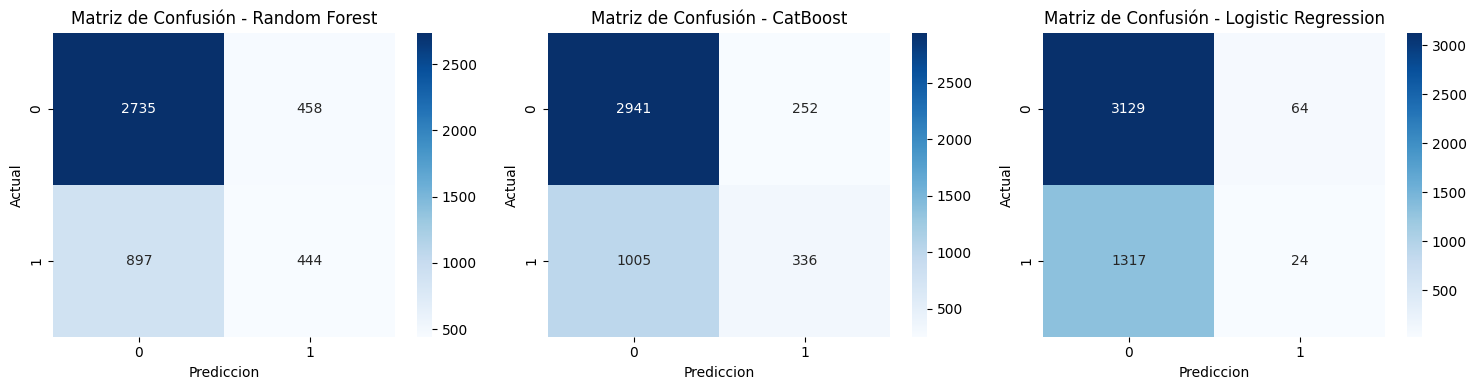

In [62]:
def plot_confusion_matrices(models, y_test, y_preds, model_names):
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 4))

    for i, model in enumerate(models):
        cm = confusion_matrix(y_test, y_preds[i])
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
        axes[i].set_title(f"Matriz de Confusión - {model_names[i]}")
        axes[i].set_xlabel("Prediccion")
        axes[i].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

models = [rf_classifier, catboost_classifier, logreg_classifier]
y_preds = [y_pred, y_pred_catboost, y_pred_logreg]
model_names = ["Random Forest", "CatBoost", "Logistic Regression"]

plot_confusion_matrices(models, y_test, y_preds, model_names)

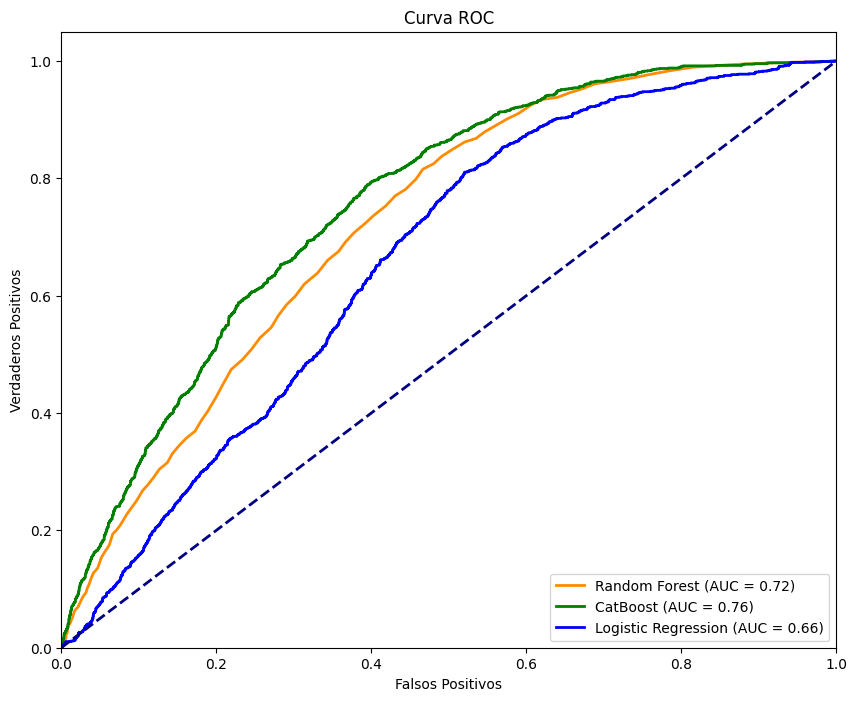

In [63]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, catboost_classifier.predict_proba(X_test)[:, 1])
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg_classifier.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_catboost, tpr_catboost, color='green', lw=2, label='CatBoost (AUC = %0.2f)' % roc_auc_catboost)
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()